# Item-item CF and SVD on ML-1m

In [ ]:
!wget -q --show-progress -O movies.dat https://github.com/RecoHut-Datasets/movielens_1m/raw/main/ml1m_items.dat
!wget -q --show-progress -O ratings.dat https://github.com/RecoHut-Datasets/movielens_1m/raw/main/ml1m_ratings.dat

movies.dat          100%[===================>] 159.77K  --.-KB/s    in 0.004s  
ratings.dat         100%[===================>]  20.59M  --.-KB/s    in 0.1s    


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
movie = pd.read_csv('movies.dat',
                     sep="\t",
                     header=None,
                     engine='python',
                     names=['movieId', 'title', 'genre'])

movie.head()

,movieId,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating = pd.read_csv('ratings.dat',
                     sep="\t",
                     header=None,
                     engine='python',
                     names=['userId', 'movieId', 'rating', 'time'])

rating.head()

,userId,movieId,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df = pd.merge(rating, movie, on='movieId')
df.head()

,userId,movieId,rating,time,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [ ]:
u_m = pd.pivot_table(df, index='userId', values='rating', columns='title')
u_m

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
print('{} users x {} movies'.format(u_m.shape[0], u_m.shape[1]))

6040 users x 3706 movies


In [ ]:
m_u = u_m.T
m_u

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Effect (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('{} movies x {} users'.format(m_u.shape[0], m_u.shape[1]))

3706 movies x 6040 users


In [ ]:
min_watch = 20
rtd = u_m.columns.values[u_m.count() < min_watch]
print('{} movies had been watched less than {} times, some of them are: \n{}'.format(len(rtd), min_watch, rtd[:5]))

663 movies had been watched less than 20 times, some of them are: 
['1-900 (1994)' '24 7: Twenty Four Seven (1997)' '24-hour Woman (1998)'
 '3 Strikes (2000)' '301, 302 (1995)']


In [ ]:
u_m = u_m.drop(rtd, axis=1).fillna(0)
m_u = m_u.drop(rtd).fillna(0)
print('{} users x {} movies'.format(u_m.shape[0], u_m.shape[1]))

6040 users x 3043 movies


## Item-based Collaborative Filtering - Cosine Similarity Method

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sim_df = pd.DataFrame(cosine_similarity(m_u), columns=m_u.index, index=m_u.index)
sim_df.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),"39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),About Adam (2000),About Last Night... (1986),Above the Rim (1994),"Absent Minded Professor, The (1961)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,"Wizard of Oz, The (1939)",Wolf (1994),"Wolf Man, The (1941)",Woman in the Dunes (Suna no onna) (1964),Woman on Top (2000),Women on the Verge of a Nervous Breakdown (1988),"Women, The (1939)",Wonder Boys (2000),"Wonderful, Horrible Life of Leni Riefenstahl, The (Die Macht der Bilder) (1993)",Wonderland (1997),Wonderland (1999),"Wood, The (1999)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zeus and Roxanne (1997),eXistenZ (1999)
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.072357,0.037011,0.079291,0.060838,0.058619,0.189965,0.172254,0.094785,0.058418,0.028171,0.021295,0.016918,0.141379,0.089850,0.068224,0.037277,0.062607,0.133014,0.063357,0.012735,0.000000,0.093493,0.066787,0.071660,0.017696,0.000000,0.093552,0.000000,0.034335,0.000000,0.085044,0.000000,0.085170,0.027793,0.227422,0.040799,0.068206,0.100472,0.117148,...,0.081888,0.051605,0.075171,0.000000,0.012938,0.047766,0.092524,0.034633,0.034492,0.028341,0.000000,0.014511,0.084494,0.048566,0.004532,0.005597,0.060784,0.034114,0.041286,0.049451,0.065333,0.000000,0.000000,0.000000,0.054429,0.091156,0.014001,0.084914,0.096464,0.117695,0.123579,0.062942,0.062749,0.038725,0.076474,0.044074,0.045280,0.039395,0.120242,0.027003
'Night Mother (1986),0.072357,1.000000,0.115290,0.115545,0.159526,0.076798,0.147437,0.095922,0.111413,0.046135,0.060254,0.108613,0.038041,0.072367,0.139323,0.102570,0.077101,0.060867,0.012505,0.087460,0.100011,0.099654,0.119731,0.106338,0.066249,0.067758,0.003423,0.070363,0.088385,0.101017,0.053917,0.063778,0.000000,0.152300,0.000000,0.098492,0.066130,0.090201,0.059582,0.077718,...,0.100298,0.058127,0.062963,0.060800,0.005676,0.156728,0.109245,0.093412,0.036517,0.107762,0.029892,0.022283,0.176508,0.032940,0.031815,0.088404,0.064351,0.019243,0.084531,0.060651,0.056887,0.084457,0.032806,0.194800,0.156500,0.112975,0.047605,0.100589,0.085522,0.218780,0.129181,0.077667,0.037901,0.053010,0.087828,0.135962,0.091150,0.074787,0.000000,0.077807
'Til There Was You (1997),0.037011,0.115290,1.000000,0.098756,0.066301,0.127895,0.112654,0.125670,0.079115,0.066598,0.019914,0.067742,0.091690,0.034371,0.197216,0.056820,0.035762,0.122712,0.022388,0.037141,0.006402,0.011894,0.050014,0.110668,0.051461,0.022744,0.009806,0.075580,0.081144,0.118025,0.021302,0.030758,

In [ ]:
def get_item_based_cf(movieId, top_n=10):
    return sim_df[movieId].sort_values(ascending=False).iloc[1:top_n+1]

In [ ]:
n_random_movies = np.random.choice(m_u.index, 5)
item_based_df = pd.DataFrame({i:get_item_based_cf(i).index for i in n_random_movies})
item_based_df

,Last Action Hero (1993),Wild Reeds (1994),Coyote Ugly (2000),Frankenstein (1931),Destination Moon (1950)
0,Waterworld (1995),Beautiful Thing (1996),Bring It On (2000),Bride of Frankenstein (1935),Earth Vs. the Flying Saucers (1956)
1,Batman Forever (1995),Total Eclipse (1995),"Replacements, The (2000)",Dracula (1931),It Came from Outer Space (1953)
2,Broken Arrow (1996),Poison (1991),Scary Movie (2000),King Kong (1933),Rocketship X-M (1950)
3,Batman Returns (1992),Naked (1993),What Lies Beneath (2000),"Wolf Man, The (1941)","Thing From Another World, The (1951)"
4,Lethal Weapon 4 (1998),Live Flesh (1997),Gone in 60 Seconds (2000),Psycho (1960),It Came from Beneath the Sea (1955)
5,True Lies (1994),"Butcher Boy, The (1998)","Skulls, The (2000)","Birds, The (1963)","Mole People, The (1956)"
6,Lethal Weapon 3 (1992),"Celluloid Closet, The (1995)",Center Stage (2000),Invasion of the Body Snatchers (1956),"Crimson Pirate, The (1952)"
7,Die Hard: With a Vengeance (1995),"Thieves (Voleurs, Les) (1996)",Road Trip (2000),Young Frankenstein (1974),Village of the Damned (1960)
8,Under Siege (1992),Priest (1994),Hollow Man (2000),"Mummy, The (1932)",Forbidden Planet (1956)
9,"Saint, The (1997)","C�r�monie, La (1995)",Here on Earth (2000),"Exorcist, The (1973)",Them! (1954)


## Item-based Collaborative Filtering - SVD Latent-factor Method

In [ ]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
mat = SVD.fit_transform(m_u)
mat

array([[  2.64002061,   0.20886467,   0.38100558, ...,  -0.35050349,
         -0.09703184,  -0.5983955 ],
       [  5.74095028,   3.93048761,  -1.88006716, ...,   2.71928544,
          1.89458597,   0.2229722 ],
       [  2.96885101,  -0.10945759,  -2.58274233, ...,   1.11202541,
          0.59461975,   1.41855637],
       ...,
       [ 26.25908443,  -0.60489232, -11.65275496, ...,  -4.27358638,
          0.0717694 ,   0.98466061],
       [  1.34894495,  -0.3087715 ,  -0.37852469, ...,   0.05222009,
          0.06860439,  -0.2829412 ],
       [ 24.44912158,  -3.27742764,  -3.12246971, ...,   7.49493703,
          4.12535436,  -0.46238114]])

In [ ]:
corr = np.corrcoef(mat)
corr

array([[1.        , 0.54835153, 0.60277459, ..., 0.33158203, 0.84608371,
        0.26115343],
       [0.54835153, 1.        , 0.77572023, ..., 0.56920875, 0.61209898,
        0.5100832 ],
       [0.60277459, 0.77572023, 1.        , ..., 0.53828702, 0.74873341,
        0.42607101],
       ...,
       [0.33158203, 0.56920875, 0.53828702, ..., 1.        , 0.27587829,
        0.80863464],
       [0.84608371, 0.61209898, 0.74873341, ..., 0.27587829, 1.        ,
        0.34411625],
       [0.26115343, 0.5100832 , 0.42607101, ..., 0.80863464, 0.34411625,
        1.        ]])

In [ ]:
def get_lf_cf(title, top_n=10):
    titles = list(m_u.index)
    idx = list(m_u.index).index(title)
    cor = corr[idx]
    return np.array(titles)[np.argsort(-cor)[1:top_n+1]]

In [ ]:
item_based_df = pd.DataFrame({i:get_lf_cf(i) for i in n_random_movies})
item_based_df

,Last Action Hero (1993),Wild Reeds (1994),Coyote Ugly (2000),Frankenstein (1931),Destination Moon (1950)
0,Maverick (1994),Guinevere (1999),"Skulls, The (2000)",Bride of Frankenstein (1935),Rocketship X-M (1950)
1,Batman & Robin (1997),"Whole Wide World, The (1996)",Nutty Professor II: The Klumps (2000),Dracula (1931),It Came from Outer Space (1953)
2,Lethal Weapon 4 (1998),When Night Is Falling (1995),"Replacements, The (2000)","Birds, The (1963)",Earth Vs. the Flying Saucers (1956)
3,Batman Returns (1992),Double Happiness (1994),What Lies Beneath (2000),"Nosferatu (Nosferatu, eine Symphonie des Graue...",Them! (1954)
4,Batman Forever (1995),"Lovers on the Bridge, The (Les Amants du Pont-...",Whatever It Takes (2000),Rosemary's Baby (1968),It Came from Beneath the Sea (1955)
5,"Avengers, The (1998)",Live Flesh (1997),Duets (2000),"Creature From the Black Lagoon, The (1954)","Thing From Another World, The (1951)"
6,Waterworld (1995),"Winslow Boy, The (1998)",Big Momma's House (2000),"Haunting, The (1963)",Forbidden Planet (1956)
7,Hot Shots! Part Deux (1993),"Pillow Book, The (1995)",Whipped (2000),"Wolf Man, The (1941)","Day the Earth Stood Still, The (1951)"
8,Beverly Hills Cop III (1994),Walking and Talking (1996),"Kid, The (2000)","Mummy, The (1932)",Voyage to the Bottom of the Sea (1961)
9,Lethal Weapon 3 (1992),Paris Is Burning (1990),Frequency (2000),Psycho (1960),"Mole People, The (1956)"


## Full User-Item Matrix Rating Prediction using SVD MF

In [ ]:
def non_zero_mean(x):
    return np.sum(x, axis=1) / np.count_nonzero(x, axis=1)

In [ ]:
v = u_m.values
diff_v = np.where(v==0, 0, v-non_zero_mean(v).reshape(-1, 1))
u_m_ = pd.DataFrame(diff_v, columns=u_m.columns, index=u_m.index)

In [ ]:
from scipy.sparse.linalg import svds

u,sigma, vt = svds(u_m_, k=12)
sigma = np.diag(sigma)
u.shape, sigma.shape, vt.shape

((6040, 12), (12, 12), (12, 3043))

In [ ]:
pred_ratings = np.dot(np.dot(u, sigma), vt) + non_zero_mean(v).reshape(-1, 1)
pred_ratings = pd.DataFrame(pred_ratings, index=u_m.index, columns=u_m.columns)
pred_ratings

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),"39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),About Adam (2000),About Last Night... (1986),Above the Rim (1994),"Absent Minded Professor, The (1961)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,"Wizard of Oz, The (1939)",Wolf (1994),"Wolf Man, The (1941)",Woman in the Dunes (Suna no onna) (1964),Woman on Top (2000),Women on the Verge of a Nervous Breakdown (1988),"Women, The (1939)",Wonder Boys (2000),"Wonderful, Horrible Life of Leni Riefenstahl, The (Die Macht der Bilder) (1993)",Wonderland (1997),Wonderland (1999),"Wood, The (1999)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.190650,4.192905,4.184182,4.174485,4.194911,4.183129,4.209184,4.205529,4.208539,4.149592,4.187304,4.179720,4.188113,4.198468,4.184574,4.154781,4.188935,4.185011,4.192235,4.191233,4.182142,4.187320,4.186628,4.186822,4.189896,4.180015,4.186827,4.198256,4.190615,4.172111,4.188263,4.190822,4.186919,4.199336,4.186270,4.198591,4.188343,4.179191,4.189260,4.186511,...,4.226289,4.176312,4.195170,4.188474,4.186805,4.179076,4.189995,4.185560,4.187465,4.187375,4.190209,4.184331,4.199049,4.164835,4.186305,4.188374,4.121179,4.184823,4.191972,4.187396,4.140158,4.185293,4.189980,4.190397,4.185707,4.180100,4.176469,4.188773,4.214921,4.187248,4.162332,4.207258,4.184385,4.186921,4.183127,4.187876,4.187639,4.177979,4.191269,4.173246
2,3.716990,3.718968,3.709183,3.694758,3.716562,3.705527,3.737749,3.723131,3.769175,3.586268,3.709746,3.680189,3.701864,3.728850,3.711097,3.678156,3.707386,3.681946,3.716922,3.706735,3.683278,3.706838,3.706922,3.693368,3.695419,3.675016,3.695556,3.730074,3.718460,3.670194,3.713569,3.700819,3.709549,3.750724,3.708009,3.721228,3.707457,3.720852,3.681854,3.694331,...,3.909353,3.686918,3.713112,3.711364,3.704999,3.690755,3.705831,3.716419,3.703131,3.711084,3.712281,3.706343,3.718189,3.603730,3.711378,3.708676,3.742572,3.723606,3.712157,3.674992,3.689927,3.698981,3.706273,3.713213,3.706762,3.693685,3.705705,3.708428,3.748449,3.730237,3.710006,3.755646,3.707338,3.714461,3.685371,3.707222,3.709970,3.685403,3.716114,3.644119
3,3.904772,3.899433,3.915509,3.905039,3.904433,3.887194,3.901021,3.879714,3.936538,3.921431,3.901830,3.891922,3.901198,3.933795,3.917965,3.967046,3.912357,3.925403,3.884639,3.906678,3.898801,3.894331,3.905160,3.912480,3.900279,3.882815,3.893989,3.908694,3.908333,3.920568,3.903055,3.900146,3.902582,3.910278,3.893992,3.908977,3.895768,3.854979,3.934589,3.

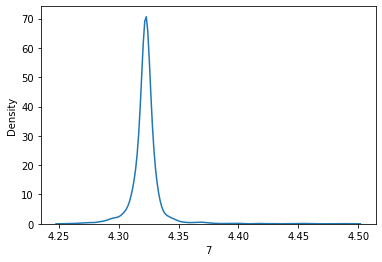

In [ ]:
import seaborn as sns

sns.kdeplot(pred_ratings.iloc[6]);